In [1]:
from data_reader.data_reader import DataReader
from data_reader.helpers import locations, mean_age
recensement=DataReader(
    path=locations("recensement"), 
    sheet_name='COM_2013',
    drop_domtom=True,
    insee_code=('CODGEO',),
    skiprows=5 # Row nb. 6 will be the columns names
).content()

In [2]:
recensement.head()

,REG,REG2016,DEP,LIBGEO,P13_POP,P13_POP0014,P13_POP1529,P13_POP3044,P13_POP4559,P13_POP6074,...,C13_POP2554_CS8,C13_POP55P,C13_POP55P_CS1,C13_POP55P_CS2,C13_POP55P_CS3,C13_POP55P_CS4,C13_POP55P_CS5,C13_POP55P_CS6,C13_POP55P_CS7,C13_POP55P_CS8
insee,,,,,,,,,,,,,,,,,,,,,
01001,82,84,01,L'Abergement-Clémenciat,767.0,176.016667,95.383333,163.233333,149.466667,125.866667,...,0.000000,220.266667,0.0,0.000000,15.733333,3.933333,19.666667,11.800000,161.266667,7.866667
01002,82,84,01,L'Abergement-de-Varey,236.0,44.376068,35.299145,60.512821,38.324786,36.307692,...,8.068376,72.615385,0.0,0.000000,0.000000,0.000000,0.000000,8.068376,64.547009,0.000000
01004,82,84,01,Ambérieu-en-Bugey,14359.0,3049.353947,2857.742493,2771.066480,2660.372622,1794.587696,...,576.509717,3866.924234,0.0,52.911143,87.563074,183.633141,213.080703,197.206645,2874.804580,257.724948
01005,82,84,01,Ambérieux-en-Dombes,1635.0,337.300803,252.470661,324.172329,377.696109,233.282891,...,30.296479,449.397776,0.0,5.049413,25.247066,20.197653,25.247066,30.296479,313.063620,30.296479
01006,82,84,01,Ambléon,108.0,11.571429,17.357143,23.142857,26.035714,19.285714,...,7.714286,50.142857,0.0,0.000000,0.000000,7.714286,7.714286,0.000000,34.714286,0.000000


# Overall look at the file and its documentation :

* Data available for 2008 & 2013), I will only look at 2013
* Data available per town, and for the 3 biggest also by arrondissement. I will keep their data aggregated at a town-level, as it's done in the referendum results.




* First columns give the number of inhabitants, first total then by age class (P13_POP-P13_POP90P, most written as e.g. P13_POP1529)
* The next columns further split it by gender. (P13_POPH-P13_F90P, most written as e.g. P13_F4559)
* Then a few columns related to people who moved within the previous year and detailing their geographical origin (e.g P13_POP01P_IRAN1) and a few columns further split it in 3 broad age classes (e.g. P13_POP1524_IRAN2P). 
* The last set of columns split the number of inhabitants into socio-professional categories (e.g. C13_POP15P_CS2), then further split by gender (e.g. C13_F15P_CS5) and into 3 broad age classes (e.g. C13_POP2554_CS7). Should be used *only for town above 2k people*

### How is it done :

* Each city < 10k people polls all of its possible once every 5 years (rolling)
* Each city > 10k polls 8% of their population every year

Then the data are brought back to the median 1st Jan. of the 5years window.



### The documentation recommends precaution in two cases :

* Cities with < 200 inhabitants : the recensement might not be precise enough
* Cities with < 2000 than inhabitants : data from "complementary exploitation" should not be used. This corresponds to socio-professional categories.

In [3]:
recensement[recensement['DEP'].str.contains('97')].DEP.unique()

array([], dtype=object)

This four departements corresponds to GUADELOUPE, MARTINIQUE, GUYANE, LA REUNION

### This recensement doesn't seem to have information on overseas territories, only overseas departements

In [4]:
recensement[recensement.LIBGEO.str.contains('Paris')]

,REG,REG2016,DEP,LIBGEO,P13_POP,P13_POP0014,P13_POP1529,P13_POP3044,P13_POP4559,P13_POP6074,...,C13_POP2554_CS8,C13_POP55P,C13_POP55P_CS1,C13_POP55P_CS2,C13_POP55P_CS3,C13_POP55P_CS4,C13_POP55P_CS5,C13_POP55P_CS6,C13_POP55P_CS7,C13_POP55P_CS8
insee,,,,,,,,,,,,,,,,,,,,,
38485,82,84,38,Seyssinet-Pariset,12156.0,2090.903029,2284.872003,2315.062487,2387.281447,2010.778345,...,304.962894,3798.189190,4.778622,43.085962,262.503430,270.658015,198.337991,88.514517,2691.683900,238.626751
62826,31,32,62,Le Touquet-Paris-Plage,4475.0,378.546514,454.980162,488.408512,732.412177,1360.770432,...,99.894219,2680.680950,0.000000,84.121448,141.954943,110.409400,78.863857,15.772771,2052.249765,197.308766
71343,26,27,71,Paris-l'Hôpital,291.0,65.846715,30.799270,62.660584,52.040146,48.854015,...,0.000000,101.956204,4.248175,0.000000,4.248175,0.000000,8.496350,4.248175,80.715328,0.000000
75056,11,11,75,Paris,2229621.0,320101.628577,522244.885427,514578.741776,406469.124314,296422.260700,...,90693.547848,592848.440306,220.293206,17517.809632,85280.669574,39200.590088,38958.429726,15640.852427,347531.467751,48498.327902
81202,73,76,81,Parisot,949.0,241.491062,88.812829,267.436383,178.623554,110.766562,...,23.949527,215.545741,3.991588,7.983176,11.974763,19.957939,11.974763,3.991588,147.688749,7.983176
82137,73,76,82,Parisot,574.0,87.398340,72.831950,93.224896,106.820193,121.414661,...,4.855463,262.195020,9.710927,4.855463,4.855463,4.855463,0.000000,4.855463,218.495850,14.566390
95176,11,11,95,Cormeilles-en-Parisis,23419.0,4730.699686,4294.875106,5074.080030,4981.460608,2743.548455,...,544.760814,5779.105573,0.000000,133.071255,477.238685,444.233318,336.721475,187.076019,3891.580146,309.184675
95241,11,11,95,Fontenay-en-Parisis,1921.0,418.144536,357.249701,405.965569,414.084880,181.504331,...,36.536901,449.359788,8.119311,4.059656,28.417590,24.357934,24.357934,28.417590,307.271839,24.357934


In [5]:
recensement[recensement.LIBGEO.str.contains('ondiss')]

,REG,REG2016,DEP,LIBGEO,P13_POP,P13_POP0014,P13_POP1529,P13_POP3044,P13_POP4559,P13_POP6074,...,C13_POP2554_CS8,C13_POP55P,C13_POP55P_CS1,C13_POP55P_CS2,C13_POP55P_CS3,C13_POP55P_CS4,C13_POP55P_CS5,C13_POP55P_CS6,C13_POP55P_CS7,C13_POP55P_CS8
insee,,,,,,,,,,,,,,,,,,,,,


# Check mean age per city :

In [6]:
recensement=recensement.assign(MeanAge=mean_age)

Text(0.5, 1.0, 'Distribution of the mean age in each town')

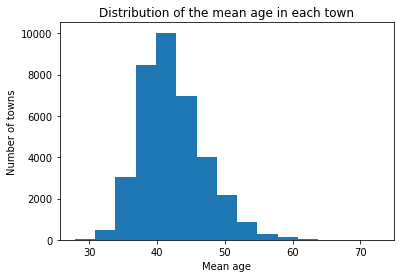

In [7]:
import matplotlib.pyplot as plt
recensement.MeanAge.plot.hist(bins=15)
plt.xlabel("Mean age")
plt.ylabel("Number of towns")
plt.title("Distribution of the mean age in each town")